# What is causing customer churn?

## Goal:
* To discover factors as to why customers are churning 
* Use drivers to develop a machine learning model to classify whether a customer will churn or not

### Import Data

In [1]:
from env import get_connection
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from scipy import stats
# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
#import my own prepare module
import prepare
# import my own function module
import function

seed = 42

## Acquire the data

- I originally acquired the data from SQL Ace, I then saved it to a csv
- The dataset, before preparation has 25 columns and 7043 rows
- Each observation (row) represents details about each individual customer
- Each column represents variables associated with the observations of each customer

In [2]:
#Acquire the data
df = acquire.get_telco_data()

#  Internet search
* Customer Service (68%)
* Bad Product (14%)
* Price (9%)
* Tenure (6%)

## Prepare the data

- As part of my planning step, I had some ideas of the questions I wanted to answer, 
    This helped me decide what information was truly necessary for me to reach my conlcusions based on 
    what I was asking
- Knowing my preliminary questions, I decided to drop numerous columns I felt held 
    little to no value to help me reach my conclusions
- During some initial exploration of the data, I noticed the total_charges column had 11 rows of non-values, 
    based on the fact that I still had 7032 rows (or observations) left, I decided to remove those rows
- Once I felt I had all the data I needed and wanted to explore, I created dummy variables to create binary 
    values for my data

### ------Data Dictionary
* Feature ---------------------- Definition -
* tenure ----------------------                  - tells how long a customer has been with the company
* online_security ------------         - tells if the customer has online security
* online_backup ------------            - tells if the customer has online backup
* device_protection ---------        - tells if the customer has device protection
* tech_support --------------             - tells if the customer has tech support 
* monthly_charges ----------          - provides the monthly charges of each customer
* total_charges --------------            - provides the total charges of the customer for the length of their tenure
* churn (TARGET) -----------           - tells whether or not the customer has churned
* internet_service_type -----    - tells what type of internet service the customer has

In [3]:
#Organizing the Data
df = function.telco_churn(df)

In [4]:
#Cleaning up the data
df = function.cleanup(df)

## Explore the data

- Does price affect whether or not a customer will churn?

- Does tenure affect whether or not a customer will churn?

- Does customer service/support affect whether or not a customer will churn?

- Does a bad internet service product affect whether or not a customer will churn?

#### ----------------------------------------Splitting the data and checking the sizes of train, validate and test----------------------------------------

In [5]:
#Splitting the Data
train, validate, test = prepare.train_val_test(df, 'churn_yes')
train.shape, validate.shape, test.shape

((4922, 16), (1266, 16), (844, 16))

# How Many Customers are Leaving?

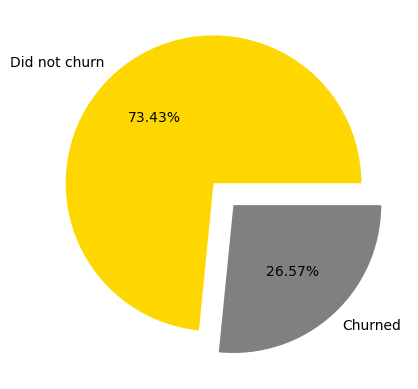

In [89]:
#plotting amount of churning customers overall
values = (3614, 1308)
labels = ('Did not churn', 'Churned')
plt.pie(values, labels = ('Did not churn', 'Churned'), autopct = "%.2f%%", explode = (0.1, 0.1), colors = ('gold', 'gray'))
plt.show()

### 1. Does price affect whether or not a customer churns? 

- I decided to use a T-Test here as I was dealing with one continuous variable (monthly charges) 
    and one discrete variable (churn)

# Price T-Test

### Hypotheses for price T-Test
- H
0
: Mean of monthly charges of churned customers <= Mean of monthly charges of customers who haven't churned
- H
a
: Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned

<AxesSubplot:title={'center':'Customers that HAVE Churned'}, xlabel='Monthly Charges', ylabel='Amount of Customers'>

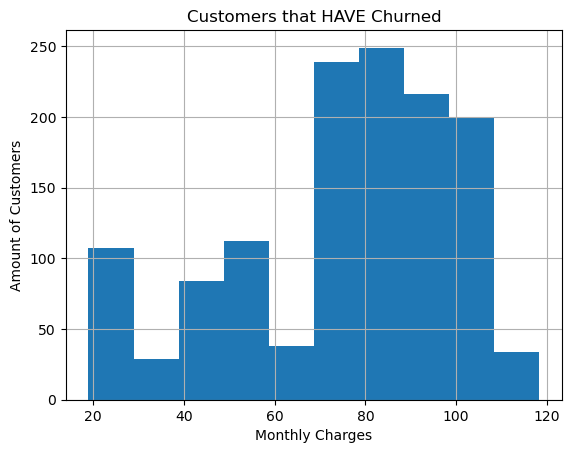

In [6]:
#Plotting distribution of Churn
churned_price = train[train.churn_yes == True].monthly_charges
plt.xlabel('Monthly Charges')
plt.ylabel('Amount of Customers')
plt.title('Customers that HAVE Churned')
churned_price.hist()

<AxesSubplot:title={'center':'Customers that have NOT Churned'}, xlabel='Monthly Charges', ylabel='Amount of Customers'>

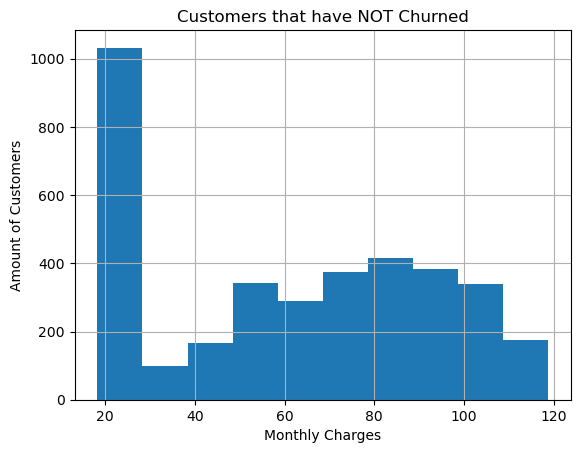

In [7]:
#Plotting distribution of Not Churning
churn_no_price = train[train.churn_yes == False].monthly_charges
plt.xlabel('Monthly Charges')
plt.ylabel('Amount of Customers')
plt.title('Customers that have NOT Churned')
churn_no_price.hist()

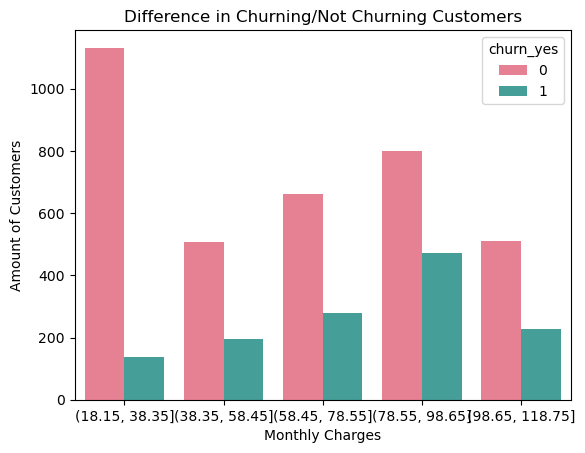

In [81]:
# create bins of equal intervals and plotting data
monthly_charges_bins = pd.cut(train.monthly_charges, 5)
sns.countplot(hue = train.churn_yes, x = monthly_charges_bins, data=train, palette = 'husl')
plt.xlabel('Monthly Charges')
plt.ylabel('Amount of Customers')
plt.title('Difference in Churning/Not Churning Customers')
plt.show()

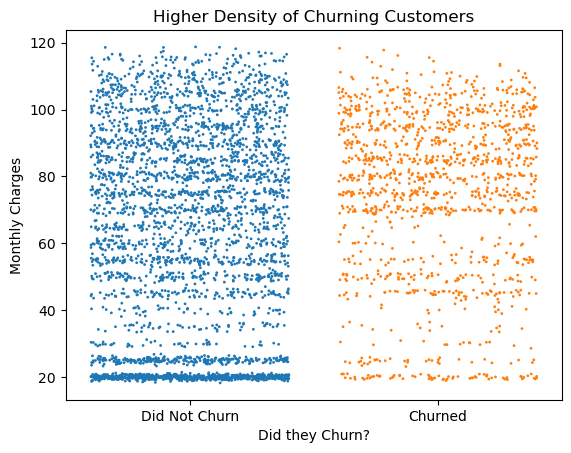

In [10]:
#Scatter Plotting monthly charges with churn
sns.stripplot(y = train.monthly_charges, x = train.churn_yes, data = train, size = 2, jitter = .4)
labels = ['Did Not Churn', 'Churned']
plt.xticks(ticks = (0, 1), labels = labels)
plt.ylabel('Monthly Charges')
plt.xlabel('Did they Churn?')
plt.title('Higher Density of Churning Customers')
plt.show()

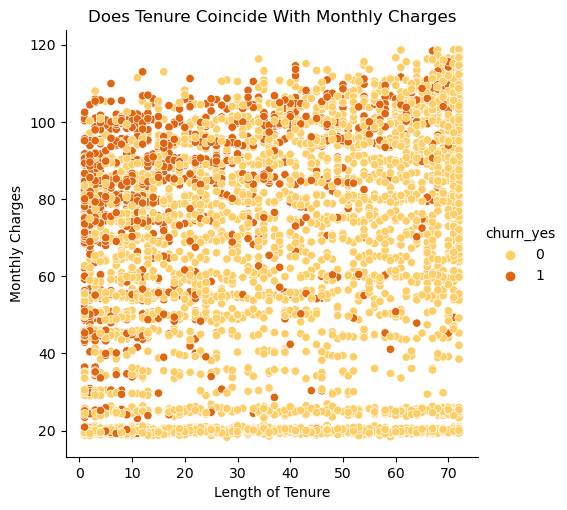

In [11]:
#Plotting Monthly Charges and Tenure
sns.relplot(train.tenure, train.monthly_charges, hue = 'churn_yes', data = train, palette = 'YlOrBr')
plt.ylabel('Monthly Charges')
plt.xlabel('Length of Tenure')
plt.title('Does Tenure Coincide With Monthly Charges')
plt.show()

In [12]:
#Running statistical T-Test
alpha = .05

t, p = stats.ttest_ind(churned_price, churn_no_price, equal_var=False)

if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis because the findings are statistically significant.",
          "\nWe can reasonably say that there is a relationship between customers churning and",
          "\nwhat they are being charged on a monthly basis.")

We reject the null hypothesis because the findings are statistically significant. 
We can reasonably say that there is a relationship between customers churning and 
what they are being charged on a monthly basis.


# Tenure T-Test

### Hypotheses for tenure T-Test
- H
0
: Length of tenure of churned customers >= length of tenure of customers who haven't churned
- H
a
: Length of tenure of churned customers < length of tenure of customers who haven't churned

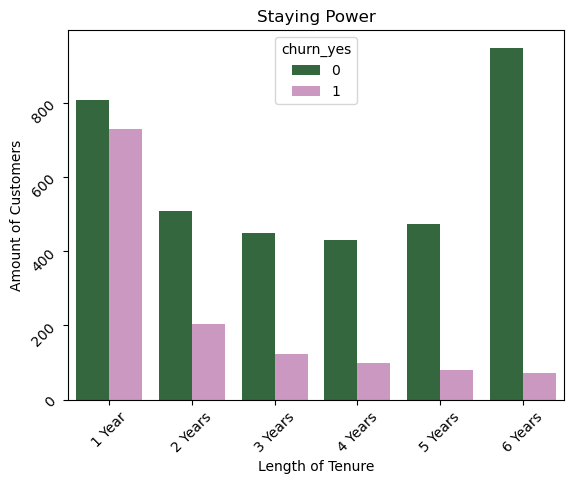

In [82]:
#Evenly distibuting tenure into bins and plotting
tenure_bins = pd.cut(train.tenure, 6, precision = 0)
tenure_bins.value_counts()
labels = ['1 Year', '2 Years', '3 Years', '4 Years', '5 Years', '6 Years']
sns.countplot(hue = train.churn_yes, x = tenure_bins, data = train, palette = 'cubehelix')
plt.yticks(rotation = 45)
plt.xticks(ticks = (0, 1, 2, 3, 4, 5), rotation = 45, labels = labels)
plt.ylabel('Amount of Customers')
plt.xlabel('Length of Tenure')
plt.title('Staying Power')
plt.show()

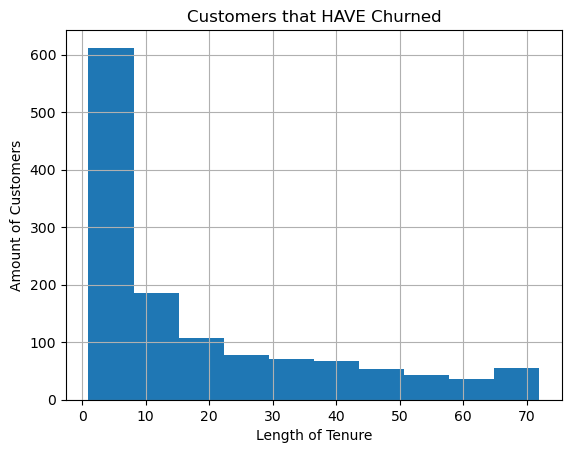

In [46]:
#plotting distribution of churning customers based on tenure
churned_tenure = train[train.churn_yes == True].tenure
churned_tenure.hist()
plt.xlabel('Length of Tenure')
plt.ylabel('Amount of Customers')
plt.title('Customers that HAVE Churned')
plt.show()

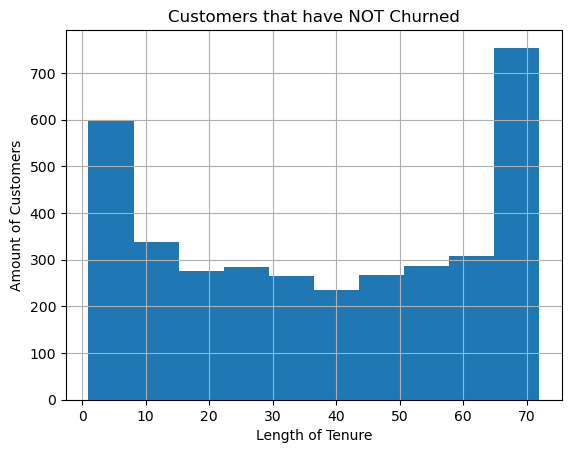

In [47]:
#plotting distribution of customers not churning based on tenure
churned_no_tenure = train[train.churn_yes == False].tenure
churned_no_tenure.hist()
plt.xlabel('Length of Tenure')
plt.ylabel('Amount of Customers')
plt.title('Customers that have NOT Churned')
plt.show()

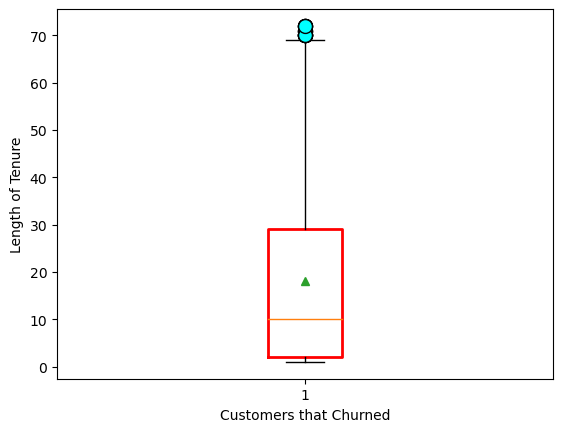

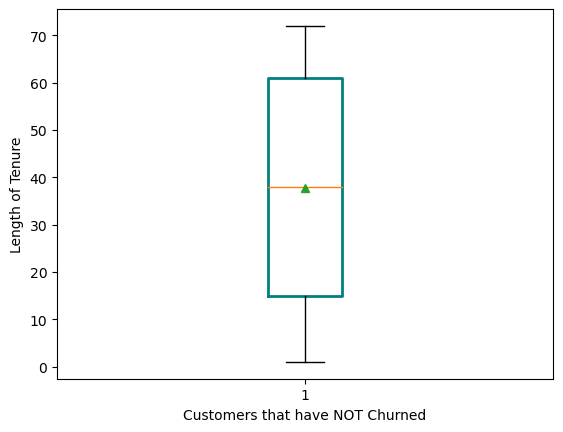

In [59]:
#More visuals based on tenure in boxplot form
boxprops1 = dict(linestyle='-', linewidth=2, color='red')
boxprops2 = dict(linestyle='-', linewidth=2, color='teal')
flierprops = dict(marker='o', markerfacecolor='cyan', markersize=10, linestyle='none')

plt.boxplot(train.tenure[train.churn_yes == True], showmeans = True, 
            boxprops = boxprops1, flierprops = flierprops)
plt.ylabel('Length of Tenure')
plt.xlabel('Customers that Churned')
plt.show()

plt.boxplot(train.tenure[train.churn_yes == False], showmeans = True, 
            boxprops = boxprops2)
plt.ylabel('Length of Tenure')
plt.xlabel('Customers that have NOT Churned')
plt.show()

In [83]:
#Running statistical T-Test
if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis because the findings are statistically significant.",
          "\nWe can reasonably say that there is a relationship between customers churning and",
          "\nhow long they have been at the company")

We reject the null hypothesis because the findings are statistically significant. 
We can reasonably say that there is a relationship between customers churning and 
how long they have been at the company


# Customer Support

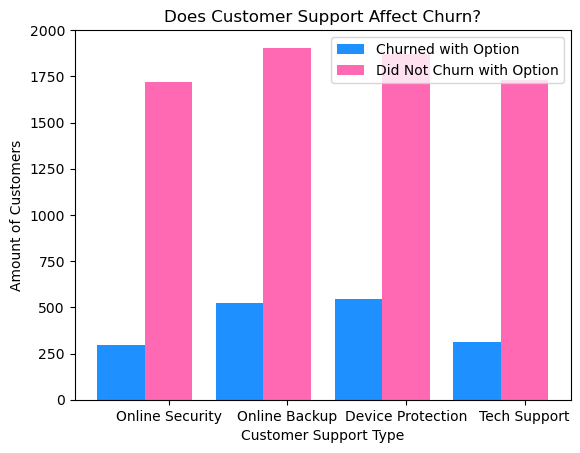

<function matplotlib.pyplot.show(close=None, block=None)>

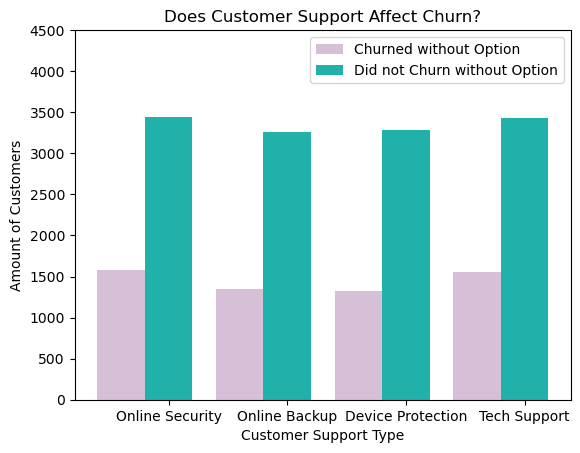

In [84]:
#plotting customer churn based on customer support options
cust_sppt_churned = (295, 523, 545, 310)
cust_sppt_no_churned = (1720, 1902, 1873, 1730)
customer_support = ('Online Security', 'Online Backup', 'Device Protection', 'Tech Support')
width = 0.4
index = np.arange(4)
plt.bar(index, cust_sppt_churned, width = width, 
        label = 'Churned with Option', color = 'dodgerblue')
plt.bar(index + width, cust_sppt_no_churned, width = width, 
        label = 'Did Not Churn with Option', color = 'hotpink')
plt.xticks(index + width, customer_support)
plt.ylim (0, 2000)
plt.title('Does Customer Support Affect Churn?')
plt.ylabel('Amount of Customers')
plt.xlabel('Customer Support Type')
plt.legend()
plt.show()
no_cust_sppt_no_churn = (3443, 3261, 3290, 3433)
no_cust_sppt_churn = (1574, 1346, 1324, 1559)
plt.bar(index, no_cust_sppt_churn, width = width, 
        label = 'Churned without Option', color = 'thistle')
plt.bar(index + width, no_cust_sppt_no_churn, width = width, 
        label = 'Did not Churn without Option', color = 'lightseagreen')
plt.xticks(index + width, customer_support)
plt.ylim (0, 4500)
plt.title('Does Customer Support Affect Churn?')
plt.ylabel('Amount of Customers')
plt.xlabel('Customer Support Type')
plt.legend()
plt.show

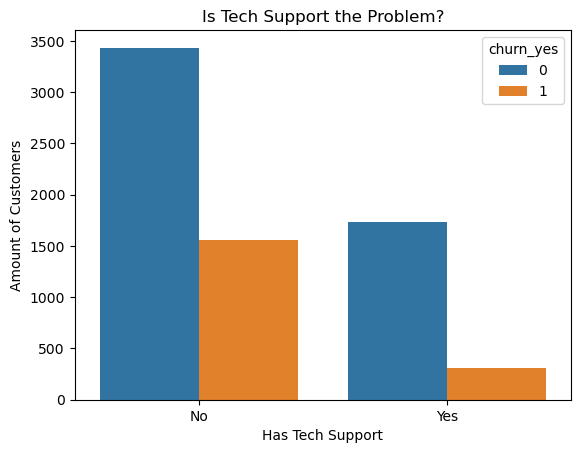

In [80]:
#plotting cutsomer churn based on tech support
sns.countplot(df['tech_support_yes'], hue = df.churn_yes)
plt.ylabel('Amount of Customers')
plt.xlabel('Has Tech Support')
plt.title('Is Tech Support the Problem?')
labels = ['No', 'Yes']
plt.xticks(ticks = (0, 1), labels = labels)
plt.show()

### Tech Support Chi^2 test

In [85]:
#running statistical chi^2 test and printing result
tech_sppt = pd.crosstab(train.churn_yes, train.tech_support_yes)

chi2, p, degf, expected = stats.chi2_contingency(tech_sppt)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

chi^2 = 132.9202
p     = 0.0000


# Bad Product

# Fiber

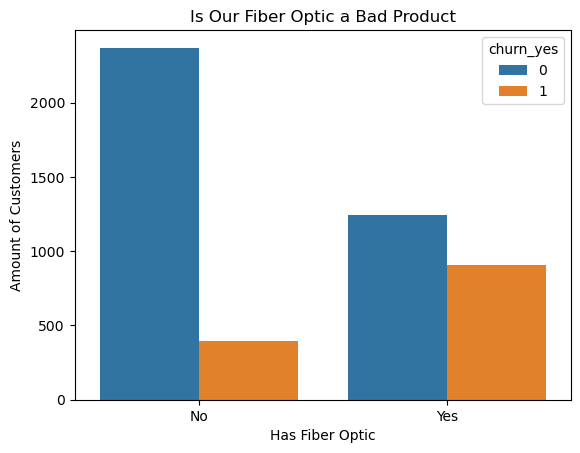

In [87]:
sns.countplot(train['has_fiber'], hue = train.churn_yes)
plt.ylabel('Amount of Customers')
plt.xlabel('Has Fiber Optic')
plt.title('Is Our Fiber Optic a Bad Product')
labels = ['No', 'Yes']
plt.xticks(ticks = (0, 1), labels = labels)
plt.show()

In [86]:
#running statistical chi^2 test and printing result
fiber = pd.crosstab(train.churn_yes, train['has_fiber'])
chi2, p, degf, expected = stats.chi2_contingency(fiber)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

chi^2 = 479.9141
p     = 0.0000


# Exploration Summary
* Monthly charges seem to have an affect on customers churning
* Tenure seems to have an affect on customers leaving especially combined with monthly charges
* There might be an issue with Tech Support as customers that opt into that tend to stay longer
* Fiber Optic seems to be a big issue, customers aren't willing to pay for a bad product

# Features for Modeling
* Monthly Charges
* Tenure
* Tech Support
* Internet Service Type
* Churn (obviously)

# Baseline Model

In [88]:
#Establishing baseline and printing accuracy
baseline_df = pd.DataFrame({'actual': df.churn_yes == True, 
                            'prediction': df.churn_yes == True})
baseline_df['baseline_prediction'] = False


baseline_accuracy = (baseline_df.baseline_prediction == baseline_df.actual).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.42%


##### So my baseline predicted that 73.42% of the time, a customer did not churn

# Decision Tree Model

In [26]:
#assigning variables
X_train = train.drop(columns=['churn_yes', 'customer_id'])
y_train = train.churn_yes

X_validate = validate.drop(columns=['churn_yes', 'customer_id'])
y_validate = validate.churn_yes

X_test = test.drop(columns=['churn_yes', 'customer_id'])
y_test = test.churn_yes

In [27]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [28]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)


# Decision Tree Results

In [29]:
# get decision tree results
function.get_tree(X_train, X_validate, y_train, y_validate)

Accuracy of Decision Tree on train data is 0.7911418122714344
Accuracy of Decision Tree on validate data is 0.7906793048973144


# RANDOM FOREST MODEL

In [30]:
#assigning variables
X_train_rf = train.drop(columns=['churn_yes', 'customer_id'])
y_train_rf = train.churn_yes

X_validate_rf = validate.drop(columns=['churn_yes', 'customer_id'])
y_validate_rf = validate.churn_yes

X_test_rf = test.drop(columns=['churn_yes', 'customer_id'])
y_test_rf = test.churn_yes

# Random Forest Results

In [31]:
# get random forest results
function.get_forest(X_train_rf, X_validate_rf, y_train_rf, y_validate_rf)

Accuracy of Random Forest on train is 0.7891101178382771
Accuracy of Random Forest on validate is 0.7867298578199052


# Logistic Regression Model


In [32]:
#assigning variables
X_train_lr = train.drop(columns=['churn_yes', 'customer_id'])
y_train_lr = train.churn_yes

X_validate_lr = validate.drop(columns=['churn_yes', 'customer_id'])
y_validate_lr = validate.churn_yes

X_test_lr = test.drop(columns=['churn_yes', 'customer_id'])
y_test_lr = test.churn_yes

# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=123,solver='liblinear')

logit.fit(X_train_lr, y_train_lr)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_train_lr)

y_pred_proba = logit.predict_proba(X_train_lr)


Coefficient: 
 [[-7.01694003e-02  5.99160668e-03  3.56818301e-04 -2.56107526e-01
  -5.23756682e-01 -2.56107526e-01 -2.19845839e-01 -2.56107526e-01
  -1.00443122e-01 -2.56107526e-01 -6.83706929e-01  4.85159609e-01
   6.51336983e-01 -2.56107526e-01]]
Intercept: 
 [-0.36657222]


# Logistic Regression Results

In [33]:
# get logistic regression results
function.get_log_reg(X_train_lr, X_validate_lr, y_train_lr, y_validate_lr)

Accuracy of Logistic Regression on train is 0.7992685900040634
Accuracy of Logistic Regression on validate is 0.7946287519747235


# Comparing Models
* Decision Tree, Random Forest, and Logistic Regression models all performed slightly better than baseline on train and validate
* A Decision Tree was model selected as the final model and had an accuracy of about 79% which is slightly higher than the baseline accuracy
* While I could have went forward with any of the models based on their performance, I chose decision tree as it was pretty consistent across most, if not all metrics

In [34]:
#Creating a table to show modeling accuracies
model_result = function.model_report()
model_result

,Model,Train Accuracy,Validate Accuracy,Precision
0,Decision Tree,79.11,79.06,81
1,Random Forest,78.91,78.67,80
2,Logistic Regression,79.92,79.46,84


# Test Decision Tree Model

In [35]:
#running test on decision tree model
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.78


# Recommendations 

# Conclusions


### Modeling
The final model outperformed outperformed the baseline by about 5.5%. 

Monthly Charges and Tenure seem to have the biggest indicator of churn when combined together. There seems to be an issue with Tech Support to a lesser degree while there seems to be a significant issue with Fiber Optic internet service

### Recommendations
Try to replicate the business model used by DirecTV by enticing customers to sign longer term contracts while giving lower monthly chrages at first, then increasing price after a probationary period.

Our Tech support and fiber optic issue can go hand in hand, if you had a better product, you wouldn't have to worry so much about tech support, but if that is too expensive, you might have to spend money on more tech support personnel. 
My recommendation is spending the money to improve the product. Statistics show that the less Customers have to deal with customer service, the more likely they won't leave.


### Next Steps
* Find out what the issue is with the Fiber optic, is it dropping, is it just poor quality? More data regarding what the issue with the fiber is could help
* Is there not enough tech support? are they inexperienced? more data here could provide either training, or let you know you need more personnel to meet the demand